### Урок 12. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

    x_train   y_train
5  1.182421  1.860341
6  1.251605  1.878928
7  1.270474  2.430015
8  1.402553  2.327856
9  1.427711  2.203649


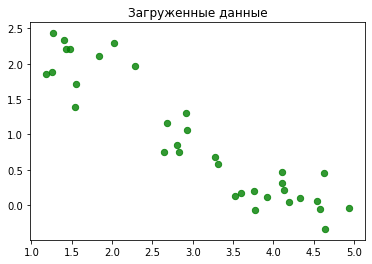

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('3.10_non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
print(data.head())

# Визуализация загруженных данных
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.title('Загруженные данные')
plt.show()

In [2]:
# Вычисляем градиент
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, l) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = (np.multiply(X, error) + l*2*w ).sum(axis=0)*(-1.0)*2.0 / n
    # grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n
    # grad = grad + 2 * l * w
    return grad, error

#Делаем шаг градиентного спуска
def eval_w_next(X, y, eta, w_current, l):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, l=l)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

# Проверяем шаги 1, 2 до сходимости
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, l=0.0) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, l=l)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, l=l)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s, lambda=%f" % (step, weight_evolution, grad, l))
    return w

step 100 |w-w_next|=0.00481, grad=[-0.46202662  0.1334703 ], lambda=0.010000
step 200 |w-w_next|=0.00392, grad=[-0.37692307  0.10888558], lambda=0.010000
step 300 |w-w_next|=0.00320, grad=[-0.30749527  0.08882927], lambda=0.010000
step 400 |w-w_next|=0.00261, grad=[-0.25085581  0.07246725], lambda=0.010000
step 500 |w-w_next|=0.00213, grad=[-0.20464912  0.05911906], lambda=0.010000
step 600 |w-w_next|=0.00174, grad=[-0.16695353  0.04822955], lambda=0.010000
step 700 |w-w_next|=0.00142, grad=[-0.13620133  0.03934585], lambda=0.010000
step 800 |w-w_next|=0.00116, grad=[-0.11111356  0.0320985 ], lambda=0.010000


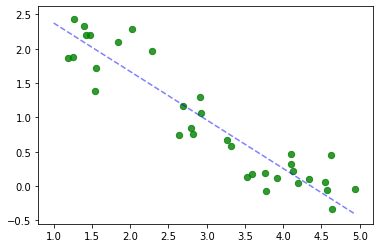

In [10]:
# Запускаем  обучение
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.01, epsilon=0.001, l=0.01)

# Применяем модель
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

# Визуализируем результаты
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.